In [255]:
import numpy as np
import seaborn as sns
import pandas as pd

# 1. Load the data into a dataframe

In [256]:
titan=pd.read_csv('train.csv')

# 2. Exploratory Data Analysis


In [257]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [259]:
titan.shape

(891, 12)

#### There are 891 records and 12 attributes. The attributes age, cabin and embarked have missing information. The attributes name, sex, ticket, cabin and embarked are object attriutes which needs to be changed to categorical.

In [260]:
titan['Name']=titan['Name'].astype('category')
titan['Sex']=titan['Sex'].astype('category')
titan['Ticket']=titan['Ticket'].astype('category')
titan['Cabin']=titan['Cabin'].astype('category')
titan['Embarked']=titan['Embarked'].astype('category')

In [261]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null category
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


## Missing data handling

In [262]:
#Age has to be missing for a few records. Lets replace it with the median age.
titan[titan['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [263]:
titan['Age'] = titan['Age'].fillna(titan['Age'].median())

In [264]:
titan[titan['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [265]:
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [266]:
# Replacing the missing value with the value with highest count
titan['Embarked'] = titan['Embarked'].fillna('S')
titan['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Outlier Detection

In [161]:
titan.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### No major outliers seems to exist in the dataset which would impact the model

In [267]:
# Removing the unnecessary columns as its not providing any inputs to the model
titan.drop(columns='PassengerId', inplace=True)
titan.drop(columns='Name', inplace=True)
titan.drop(columns='Ticket', inplace=True)
titan.drop(columns='Fare', inplace=True)
titan.drop(columns='Parch', inplace=True)
titan.drop(columns='SibSp', inplace=True)


In [268]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
Cabin       204 non-null category
Embarked    891 non-null category
dtypes: category(3), float64(1), int64(2)
memory usage: 30.8 KB


In [269]:
titan['Cabin'].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F2                 3
C22 C26            3
D                  3
F33                3
E101               3
C125               2
D33                2
B58 B60            2
D36                2
B49                2
D26                2
B5                 2
D20                2
D17                2
B51 B53 B55        2
B57 B59 B63 B66    2
D35                2
B77                2
C93                2
C92                2
B28                2
C83                2
C78                2
C68                2
C65                2
C52                2
C2                 2
                  ..
D47                1
D45                1
C148               1
D37                1
C30                1
C32                1
C45                1
C46                1
C47                1
C49                1
C50                1
C54                1
C7                 1
C70                1
C82                1
C85                1
C86          

In [270]:
titan['Cabin'] = titan['Cabin'].cat.add_categories('Unknown')
titan['Cabin'] = titan['Cabin'].fillna('Unknown')

In [271]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null category
Age         891 non-null float64
Cabin       891 non-null category
Embarked    891 non-null category
dtypes: category(3), float64(1), int64(2)
memory usage: 30.8 KB


In [272]:
titan.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Cabin', 'Embarked'], dtype='object')

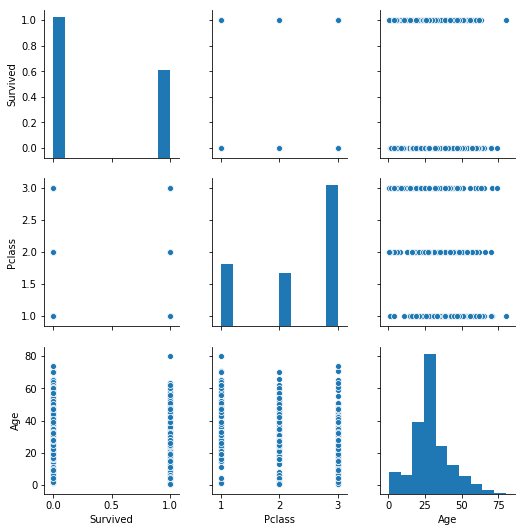

In [273]:
sns.pairplot(titan)

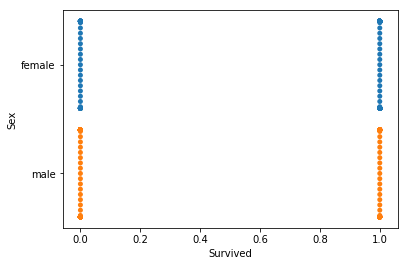

In [274]:
sns.swarmplot(titan['Survived'],titan['Sex'])

[Text(0, 0, 'A10'),
 Text(0, 0, 'A14'),
 Text(0, 0, 'A16'),
 Text(0, 0, 'A19'),
 Text(0, 0, 'A20'),
 Text(0, 0, 'A23'),
 Text(0, 0, 'A24'),
 Text(0, 0, 'A26'),
 Text(0, 0, 'A31'),
 Text(0, 0, 'A32'),
 Text(0, 0, 'A34'),
 Text(0, 0, 'A36'),
 Text(0, 0, 'A5'),
 Text(0, 0, 'A6'),
 Text(0, 0, 'A7'),
 Text(0, 0, 'B101'),
 Text(0, 0, 'B102'),
 Text(0, 0, 'B18'),
 Text(0, 0, 'B19'),
 Text(0, 0, 'B20'),
 Text(0, 0, 'B22'),
 Text(0, 0, 'B28'),
 Text(0, 0, 'B3'),
 Text(0, 0, 'B30'),
 Text(0, 0, 'B35'),
 Text(0, 0, 'B37'),
 Text(0, 0, 'B38'),
 Text(0, 0, 'B39'),
 Text(0, 0, 'B4'),
 Text(0, 0, 'B41'),
 Text(0, 0, 'B42'),
 Text(0, 0, 'B49'),
 Text(0, 0, 'B5'),
 Text(0, 0, 'B50'),
 Text(0, 0, 'B51 B53 B55'),
 Text(0, 0, 'B57 B59 B63 B66'),
 Text(0, 0, 'B58 B60'),
 Text(0, 0, 'B69'),
 Text(0, 0, 'B71'),
 Text(0, 0, 'B73'),
 Text(0, 0, 'B77'),
 Text(0, 0, 'B78'),
 Text(0, 0, 'B79'),
 Text(0, 0, 'B80'),
 Text(0, 0, 'B82 B84'),
 Text(0, 0, 'B86'),
 Text(0, 0, 'B94'),
 Text(0, 0, 'B96 B98'),
 Text(0, 0, 

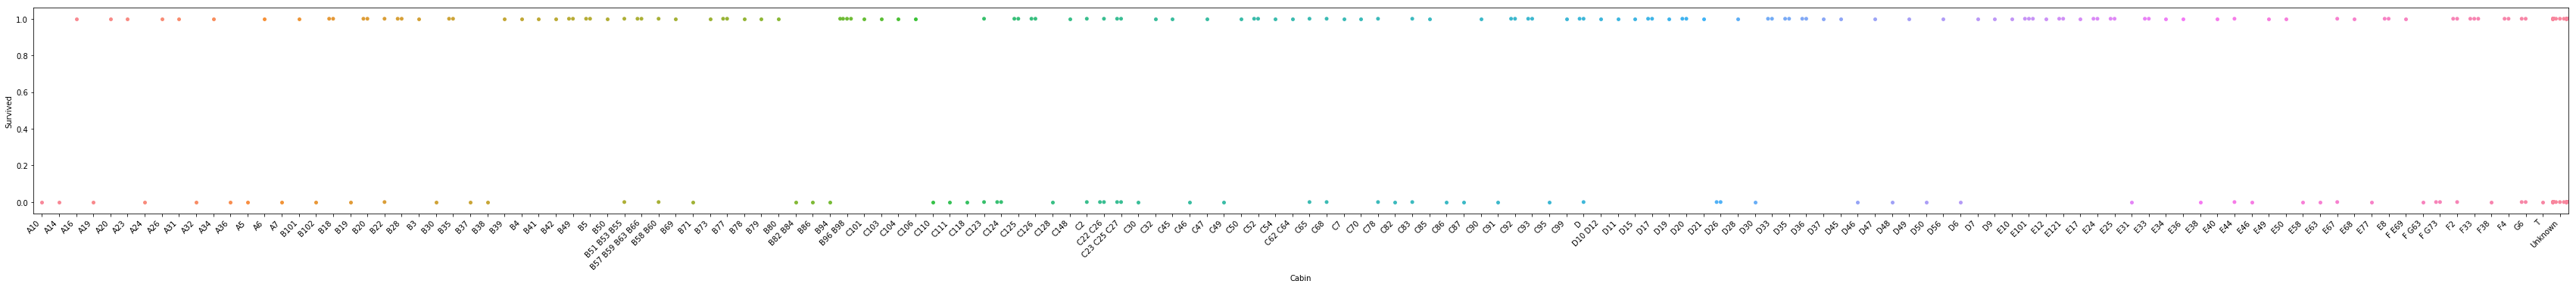

In [275]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,5))
plot=sns.swarmplot(titan['Cabin'],titan['Survived'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

In [279]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 711 to 347
Data columns (total 7 columns):
Pclass      623 non-null int64
Sex         623 non-null int32
Age         623 non-null float64
SibSp       623 non-null int64
Parch       623 non-null int64
Cabin       623 non-null int32
Embarked    623 non-null int32
dtypes: float64(1), int32(3), int64(3)
memory usage: 31.6 KB


# Converting string data to integers

In [280]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [281]:
le_sex = LabelEncoder()
le_sex.fit(titan['Sex'])
titan['Sex']=le_sex.transform(titan['Sex'])

le_cabin = LabelEncoder()
le_cabin.fit(titan['Cabin'])
titan['Cabin']=le_cabin.transform(titan['Cabin'])

le_embarked = LabelEncoder()
le_embarked.fit(titan['Embarked'])
titan['Embarked']=le_embarked.transform(titan['Embarked'])

titan.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,0,3,1,22.0,147,2
1,1,1,0,38.0,81,0
2,1,3,0,26.0,147,2
3,1,1,0,35.0,55,2
4,0,3,1,35.0,147,2


# Handling Class Imbalance

In [494]:
y_titan = titan.pop('Survived')
X_titan = titan


In [495]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority', n_jobs=5)
X_res, y_res = sm.fit_resample(X_titan, y_titan)

In [496]:
X_res.shape

(1098, 5)

# Standardizing the data

In [497]:
scaler = StandardScaler()
scaler.fit(X_res)
X_train = scaler.transform(X_res)
X_train

array([[ 0.89608835,  0.88925397, -0.53614027,  0.4796473 ,  0.60821312],
       [-1.49546644, -1.15584966,  0.69718353, -1.29814799, -1.96123398],
       [ 0.89608835, -1.15584966, -0.22780932,  0.4796473 ,  0.60821312],
       ...,
       [-0.29968905, -1.15584966,  1.47948971,  0.4796473 ,  0.60821312],
       [-0.38436723, -1.15584966,  0.5211838 , -1.04999893,  0.42625943],
       [-1.0522928 , -1.15584966, -0.41324661, -0.38928433,  0.13207465]])

# Splitting the data into training and validation set

In [498]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_titan, y_titan, test_size=0.3)

In [499]:
X_train.shape

(623, 5)

In [500]:
X_val.shape

(268, 5)

In [501]:
y_train.shape

(623,)

In [502]:
y_val.shape

(268,)

# Implementing ML model for Survival prediciton

### Naive Bayes

In [503]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [504]:
y_pred=gnb.predict(X_val)

In [505]:
gnb.score(X_val, y_val)

0.7350746268656716

In [506]:
confusion_matrix(y_pred, y_val)

array([[110,  25],
       [ 46,  87]], dtype=int64)

# Logistic Regression

In [507]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10, n_jobs=10)
lr.fit(X_train, y_train)

C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=10, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [508]:
y_pred=lr.predict(X_val)

In [509]:
confusion_matrix(y_pred, y_val)

array([[122,  29],
       [ 34,  83]], dtype=int64)

In [510]:
lr.score(X_val, y_val)

0.7649253731343284

# RandomForest

In [511]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, n_estimators = 100, class_weight="balanced", max_features=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [512]:
y_pred = rf.predict(X_val)

In [513]:
confusion_matrix(y_pred, y_val)

array([[136,  35],
       [ 20,  77]], dtype=int64)

In [514]:
rf.score(X_val,y_val)

0.7947761194029851

# XGBoost

In [539]:
import xgboost as xgb

xg=xgb.XGBClassifier(max_depth=5, learning_rate=0.001)
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [540]:
y_pred=xg.predict(X_val)

In [541]:
xg.score(X_val, y_val)

0.7985074626865671

In [542]:
confusion_matrix(y_pred, y_val)

array([[140,  38],
       [ 16,  74]], dtype=int64)

# Ensemble of Naive Bayes

In [621]:
from sklearn.ensemble import BaggingClassifier
bag_nb = BaggingClassifier(base_estimator=GaussianNB(), max_features=3, n_jobs=5, max_samples=20)
bag_nb.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=3,
                  max_samples=20, n_estimators=10, n_jobs=5, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [622]:
y_pred=bag_nb.predict(X_val)

In [623]:
bag_nb.score(X_val, y_val)

0.7574626865671642

In [624]:
confusion_matrix(y_pred, y_val)

array([[126,  35],
       [ 30,  77]], dtype=int64)

# Preparing the test data for prediction

In [625]:
test_orig=pd.read_csv('test.csv')
test = test_orig

In [626]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [627]:
# Removing the unnecessary columns as its not providing any inputs to the model
test=test.drop(columns='PassengerId')
test=test.drop(columns='Name')
test=test.drop(columns='Ticket')
test=test.drop(columns='Fare')
test=test.drop(columns='Parch')
test=test.drop(columns='SibSp')

In [628]:
test_orig.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [629]:
test['Sex']=test['Sex'].astype('category')
test['Cabin']=test['Cabin'].astype('category')
test['Embarked']=test['Embarked'].astype('category')

In [630]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna('S')

In [631]:
test['Cabin'] = test['Cabin'].cat.add_categories('Unknown')
test['Cabin'] = test['Cabin'].fillna('Unknown')

In [632]:
le_sex = LabelEncoder()
le_sex.fit(test['Sex'])
test['Sex']=le_sex.transform(test['Sex'])

le_cabin = LabelEncoder()
le_cabin.fit(test['Cabin'])
test['Cabin']=le_cabin.transform(test['Cabin'])

le_embarked = LabelEncoder()
le_embarked.fit(test['Embarked'])
test['Embarked']=le_embarked.transform(test['Embarked'])

test.head()

,Pclass,Sex,Age,Cabin,Embarked
0,3,1,34.5,76,1
1,3,0,47.0,76,2
2,2,1,62.0,76,1
3,3,1,27.0,76,2
4,3,0,22.0,76,2


In [633]:
lr_pred_test = lr.predict(test)
gnb_pred_test = gnb.predict(test)
rf_pred_test = rf.predict(test)
xg_pred_test = xg.predict(test)
bag_nb_pred_test = bag_nb.predict(test)

In [634]:
test_orig.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [635]:
lr_pred_test_sub = pd.DataFrame(test_orig['PassengerId'])
gnb_pred_test_sub = pd.DataFrame(test_orig['PassengerId'])
rf_pred_test_sub = pd.DataFrame(test_orig['PassengerId'])
xg_pred_test_sub = pd.DataFrame(test_orig['PassengerId'])
bag_nb_pred_test_sub = pd.DataFrame(test_orig['PassengerId'])

In [636]:
lr_pred_test_sub = lr_pred_test_sub.join(pd.DataFrame(lr_pred_test))
gnb_pred_test_sub = gnb_pred_test_sub.join(pd.DataFrame(gnb_pred_test))
rf_pred_test_sub = rf_pred_test_sub.join(pd.DataFrame(rf_pred_test))
xg_pred_test_sub = xg_pred_test_sub.join(pd.DataFrame(xg_pred_test))
bag_nb_pred_test_sub = bag_nb_pred_test_sub.join(pd.DataFrame(bag_nb_pred_test))

In [638]:
bag_nb_pred_test_sub

,PassengerId,0
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [639]:
lr_pred_test_sub.columns=(['PassengerId','Survived'])
gnb_pred_test_sub.columns=(['PassengerId','Survived'])
rf_pred_test_sub.columns=(['PassengerId','Survived'])
xg_pred_test_sub.columns=(['PassengerId','Survived'])
bag_nb_pred_test_sub.columns=(['PassengerId','Survived'])

In [640]:
bag_nb_pred_test_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [641]:
lr_pred_test_sub.to_csv('lr_sub3.csv')


In [642]:
gnb_pred_test_sub.to_csv('gnb_sub3.csv')


In [643]:
rf_pred_test_sub.to_csv('rf_sub3.csv',)

In [644]:
xg_pred_test_sub.to_csv('xg_sub3.csv')


In [645]:
bag_nb_pred_test_sub.to_csv('bag_nb_sub3.csv')